# Andrew Kim

# ADS 509-01-SU23: Applied Text Mining

# Assignment 2.1: Tokenization, Normalization, and Descriptive Statistics

# 5/22/2023

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment, you put together Twitter data and lyrics data on two artists. In this assignment, we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
# Load required packages
import os
import re
import emoji
import pandas as pd
import numpy as np
import string

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

# Add any additional import statements you need here
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/andre/OneDrive/Documents/ADS509/textrepo/"

# These subfolders should still work if you correctly stored the data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [3]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = sum(len(i) for i in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        c = Counter(tokens)
        top_five = c.most_common(5)
        top_five_df = pd.DataFrame(top_five, columns= ['Token', 'Count'])
        print("\nFive Most Common Tokens: \n\n", top_five_df)

    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [4]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.

Five Most Common Tokens: 

      Token  Count
0     text      3
1     here      2
2  example      2
3       is      1
4     some      1


Q: Why is it beneficial to use assertion statements in your code? 

A: __Assertion statements enables users to test and detect the correctness of the codes and functions by analyzing if some specific conditions remain true.__

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [5]:
# Read in the lyrics data
artists = ["eltonjohn", "nirvana"]
lyrics_filepaths = []
artist_list = []

for i in artists:

    # Set file path for the artists (lyrics) selected
    path = data_location + lyrics_folder + i

    # Use glob to retrieve file paths recursively from inside the directories/files
    txt_files = glob.glob(os.path.normpath(os.path.join(path, "*.txt")))

    # Create the artists (lyrics) list for df
    temp_list = [i] * len(txt_files)
    artist_list = artist_list + temp_list

    # Combine the artists filepaths
    lyrics_filepaths = lyrics_filepaths + txt_files

lyrics_list = []
song_list = []

for file in lyrics_filepaths:

    # Song
    file_temp = open(file, "r")
    title = file_temp.readline().rstrip()
    song_list.append(title)

    # Lyrics
    list = file_temp.readlines()[1:]
    lyrics = "".join(list)
    lyrics = lyrics.replace('\n', " ")
    lyrics_list.append(lyrics)
    file_temp.close()

# Convert to df
dict = {'Artist': artist_list, 'Song': song_list, 'Lyrics': lyrics_list}
lyrics_df = pd.DataFrame(dict)

lyrics_df.head(10)

,Artist,Song,Lyrics
0,eltonjohn,"""All Across The Havens""",The sister of sunlight Comes to my lonely l...
1,eltonjohn,"""Border Song""","Holy Moses, I have been removed I have seen..."
2,eltonjohn,"""Empty Sky""","I'm not a rat to be spat on, locked up in t..."
3,eltonjohn,"""First Episode At Hienton""",I was one as you were one And we were two s...
4,eltonjohn,"""Gulliver""",Gulliver's gone to the final command of his...
5,eltonjohn,"""Hymn 2000""",She chose the soft center And took it to be...
6,eltonjohn,"""I Need You To Turn To""",You're not a ship to carry my life You are ...
7,eltonjohn,"""It's Me That You Need""",Hey there Look in the mirror Are you afraid...
8,eltonjohn,"""Just Like Strange Rain""",I looked up from my glass into the sky Ther...
9,eltonjohn,"""Lady Samantha""",When the shrill winds are screaming And the...


In [6]:
# Read in the twitter data 
twitter_location = data_location + twitter_folder
twitter_filepaths = glob.glob(os.path.normpath(os.path.join(twitter_location, "*followers_data.txt")))
res = []
artist_list = []

for file in twitter_filepaths:

    file_temp = open(file, "r")
    colnames = file_temp.readline().rstrip().split('\t')
    lines = file_temp.readlines()
    
    for x in lines:
        text_temp = x.rstrip().split('\t')
        res.append(text_temp)

        # Retrieve the artists for df
        art_temp = file[file.rindex('\\')+1:]
        artist = art_temp.split('_followers')[0]
        artist_list.append(artist)
        
    file_temp.close

# Create df
twitter_df = pd.DataFrame(res, columns=colnames)
twitter_df['artist'] = artist_list
twitter_df.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,,1302,1014,None,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [7]:
punctuation = set(punctuation) # speeds up comparison

# First, clean the twitter data.
twitter_clean_df = twitter_df.copy()

# Tokenize and remove any data missing, punctuations, and lowercase words within the 'description' category
twitter_clean_df = twitter_clean_df.dropna()
twitter_clean_df['description'] = twitter_clean_df['description'].str.replace('[{}]'.format(string.punctuation), 
                                                                              '')
twitter_clean_df['description'] = twitter_clean_df['description'].str.lower()
twitter_clean_df['description'] = twitter_clean_df['description'].str.split()

# Remove stopwords to reduce dataset size and training time
stop_words = stopwords.words('english')
tweet_nostop = twitter_clean_df['description'].apply(lambda x: [item for item in x if item not in stop_words])
twitter_clean_df['description'] = tweet_nostop

In [8]:
# Now, clean the lyrics data
lyrics_clean_df = lyrics_df.copy()

lyrics_clean_df = lyrics_clean_df.dropna()
lyrics_clean_df['Lyrics'] = lyrics_clean_df['Lyrics'].str.replace('[{}]'.format(string.punctuation), '')
lyrics_clean_df['Lyrics'] = lyrics_clean_df['Lyrics'].str.lower()
lyrics_clean_df['Lyrics'] = lyrics_clean_df['Lyrics'].str.split()

stop_words = stopwords.words('english')
lyric_nostop = lyrics_clean_df['Lyrics'].apply(lambda x: [item for item in x if item not in stop_words])
lyrics_clean_df['Lyrics'] = lyric_nostop

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls).

In [9]:
# calls to descriptive_stats here

# twitter - cher
# cher = twitter_clean[twitter_clean['artist'] == 'cher']
# cher_corpus = [element for list_ in cher['description'].values for element in list_]
# print("\nCher Twitter Results:\n")
# print(descriptive_stats(cher_corpus))

# twitter - robynkonichiwa
# rob = twitter_clean[twitter_clean['artist'] == 'robynkonichiwa']
# rob_corpus = [element for list_ in rob['description'].values for element in list_]
# print("\nrobynkonichiwa Twitter Results:\n")
# print(descriptive_stats(rob_corpus))

# lyrics - Elton John
eltonjohn = lyrics_clean_df[lyrics_clean_df['Artist'] == 'eltonjohn']
eltonjohn_corpus = [element for list_ in eltonjohn['Lyrics'].values for element in list_]
print("Elton John Lyrics Results:\n")
print(descriptive_stats(eltonjohn_corpus))

# lyrics - Nirvana
nirvana = lyrics_clean_df[lyrics_clean_df['Artist'] == 'nirvana']
nirvana_corpus = [element for list_ in nirvana['Lyrics'].values for element in list_]
print("\nNirvana Lyrics Results:\n")
print(descriptive_stats(nirvana_corpus))

Elton John Lyrics Results:

There are 2350 tokens in the data.
There are 825 unique tokens in the data.
There are 11311 characters in the data.
The lexical diversity is 0.351 in the data.

Five Most Common Tokens: 

   Token  Count
0    na    121
1  take     31
2  rain     23
3  like     22
4   one     22
[2350, 825, 0.35106382978723405, 11311]

Nirvana Lyrics Results:

There are 2157 tokens in the data.
There are 482 unique tokens in the data.
There are 10362 characters in the data.
The lexical diversity is 0.223 in the data.

Five Most Common Tokens: 

   Token  Count
0  dont     85
1    im     79
2  girl     52
3  yeah     48
4  said     38
[2157, 482, 0.22345850718590635, 10362]


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: __A key difference that would be noted towards the top 5 words if the stopwords were left in the data would be that the data or list of top 5 words would contain words that are noisy or misproperly formatted. Leaving stop words would not add analytical context towards the information within the data that are important and they would not enable users to assess the context of a sentence.__ 

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: __My initial belief prior to this assignment was that each of the artists would generate a high amount of lexical diversity amongst each of their respective songs and lyrcis. After analyzing, dissecting, and cleaning the data between the artists, I am surprised that there is not much lexical diversity amongst the artists. Another note that surprised me was the number of token words that generated while not in proper format, which leads to the idea of labeling the words as stop words and tokenizing them while cleaning the data more in the future.__


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [10]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [11]:
# cher
emoji_list = emoji.emoji_list(cher_corpus)
emoji_df = pd.DataFrame(emoji_list)
emoji_df['emoji'] = emoji_df['emoji'].astype(str)
cher_res = emoji_df.groupby('emoji')['emoji'].count().sort_values(ascending=False).head(10)
print('cher Emoji Results:\n', cher_res)

# robynkonichiwa
emoji_list = emoji.emoji_list(rob_corpus)
emoji_df = pd.DataFrame(emoji_list)
emoji_df['emoji'] = emoji_df['emoji'].astype(str)
rob_res = emoji_df.groupby('emoji')['emoji'].count().sort_values(ascending=False).head(10)
print('\nrobynkonichiwa Emoji Results:\n', rob_res)

cher Emoji Results:
 emoji
['♥']    10152
['❤']     9653
['✨']     8343
['🌈']     5482
['💙']     3685
['💜']     3499
['🌊']     3291
['💕']     3259
['🖤']     2937
['🎶']     2384
Name: emoji, dtype: int64

robynkonichiwa Emoji Results:
 emoji
['♥']    1166
['✨']     751
['❤']     652
['🌈']     570
['🎶']     272
['🎧']     213
['🖤']     212
['💜']     205
['💙']     181
['🐶']     166
Name: emoji, dtype: int64


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [18]:
twitter_ht = twitter_df.copy()
twitter_ht = twitter_ht.dropna()
twitter_ht['description'] = twitter_ht['description'].str.lower()
twitter_ht['description'] = twitter_ht['description'].str.split()

cher_ht = twitter_ht[twitter_ht['artist'] == 'cher']
cher_corpus_ht = [element for list_ in cher_ht['description'].values for element in list_]

rob_ht = twitter_ht[twitter_ht['artist'] == 'robynkonichiwa']
rob_corpus_ht = [element for list_ in rob_ht['description'].values for element in list_]

#cher
cher_ht_list = [i for i in cher_corpus_ht if i.startswith("#")]
cher_count = Counter(cher_ht_list)
df = pd.DataFrame.from_dict(cher_count, orient='index').reset_index()
df = df.rename(columns={'index' : 'hashtags', 0:'count'})

cher_res = df.sort_values(by='count', ascending=False).head(10)
print("Cher Hashtag Results:\n")
print(cher_res)

# robynkonichiwa
rob_ht_list = [i for i in rob_corpus_ht if i.startswith("#")]
rob_count = Counter(rob_ht_list)
df = pd.DataFrame.from_dict(rob_count, orient='index').reset_index()
df = df.rename(columns={'index' : 'hashtags', 0:'count'})

rob_res = df.sort_values(by='count', ascending=False).head(10)
print("\nrobynknoichiwa Hashtag Results:\n")
print(rob_res)

Cher Hashtag Results:

              hashtags  count
29             #resist   9558
14                #blm   8753
3    #blacklivesmatter   7432
45                #fbr   2922
1       #theresistance   2883
85         #resistance   2405
105                 #1   2226
86                   #   1965
249          #voteblue   1897
528             #lgbtq   1457

robynknoichiwa Hashtag Results:

              hashtags  count
71   #blacklivesmatter    563
29                #blm    324
105             #music    260
39                  #1    187
871                  #    150
573    #teamfollowback    117
767               #edm    104
240            #resist     76
540       #freebritney     63
392             #lgbtq     58


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [12]:
stitle_clean = lyrics_df.copy()
stitle_clean = stitle_clean.dropna()
stitle_clean['Song'] = stitle_clean['Song'].str.replace('[{}]'.format(string.punctuation), '')
stitle_clean['Song'] = stitle_clean['Song'].str.lower()
stitle_clean['Song'] = stitle_clean['Song'].str.split()

stop_words = stopwords.words('english')
stitle_nostop = stitle_clean['Song'].apply(lambda x: [item for item in x if item not in stop_words])
stitle_clean['Song'] = stitle_nostop

# elton john
eltonjohn = stitle_clean[stitle_clean['Artist'] == 'eltonjohn']
eltonjohn_corpus = [element for list_ in eltonjohn['Song'].values for element in list_]

# nirvana
nirvana = stitle_clean[stitle_clean['Artist'] == 'nirvana']
nirvana_corpus = [element for list_ in nirvana['Song'].values for element in list_]

In [13]:
# elton john
eltonjohn_wordcount = Counter(eltonjohn_corpus)
df = pd.DataFrame.from_dict(eltonjohn_wordcount, orient='index').reset_index()
df = df.rename(columns={'index' : 'word', 0:'count'})

eltonjohn = df.sort_values(by='count', ascending=False).head(10)
print("Elton JOhn Title Results:\n")
print(eltonjohn)

# nirvana
nirvana_wordcount = Counter(nirvana_corpus)
df = pd.DataFrame.from_dict(nirvana_wordcount, orient='index').reset_index()
df = df.rename(columns={'index' : 'word', 0:'count'})

nirvana = df.sort_values(by='count', ascending=False).head(10)
print("\nNirvana Song Title Results:\n")
print(nirvana)

Elton JOhn Title Results:

       word  count
17     lady      2
3      song      2
12     need      2
0    across      1
27  skyline      1
22  strings      1
23   louise      1
24    sails      1
25    sixty      1
26    years      1

Nirvana Song Title Results:

           word  count
0          girl      1
16        creep      1
29  territorial      1
28         meet      1
27         swap      1
26       spirit      1
25         teen      1
24         like      1
23       smells      1
22      sifting      1


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

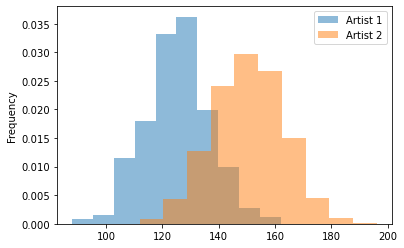

In [14]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: __The `'\s+'` regular expression matches on to one or more whitespace characters.__

In [15]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

Artist
eltonjohn    AxesSubplot(0.125,0.125;0.775x0.755)
nirvana      AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

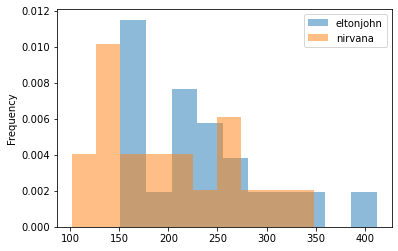

In [17]:
# lyric length comparison chart
hist_df = lyrics_df.copy()

# Tokenize for song/lyric length
hist_df['Lyrics'] = hist_df['Lyrics'].apply(tokenize_lyrics)
hist_df['length'] = hist_df['Lyrics'].apply(len)

# Plot histogram
hist_df.groupby('Artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)